<a href="https://github.com/victoresende19">![Foo](https://www.jornaldevinhedo.com.br/wp-content/uploads/2022/07/1e45483b-4bba-4b0c-b885-de7715cf8afd.jpeg)</a>

<h2 style="text-align:center">Processamento de Linguagem Natural: Plano de Governo Simone Tebet (MDB) <h2\>
<p style="text-align:center;font-size:13px;"></p>
   
<h2 style="text-align:center">Victor Augusto Souza Resende<h2\>
<p style="text-align:center;font-size:13px;">Autor</p>

## Sumário

- [1. Contexto](#1) <br>
    
- [2. Instaçaões e Bibliotecas](#2) <br>
    
- [3. Leitura do arquivo PDF](#3) <br>
    
- [4. Exploração do PDF](#4) <br>
    
- [5. Junção de todo contéudo](#5) <br>
    
- [6. Pipeline](#6) <br>
    * [6.1 - Lower case](#61)<br>
    * [6.2 - Retirar pontuação](#62)<br>
    * [6.3 - Tokenização](#63)<br>
    * [6.4 - Stop words](#64)<br>
        
- [7. Gráficos](#7) <br>
    * [7.1 - Gráfico de frequência dos tokens limpos ](#7)<br>
    * [7.2 - Nuvem de palavras](#7)<br>

## Contexto  <a id="1"></a>

A análise a seguir tem como objetivo aplicar técnicas de Processamento de Linguagem Natural sobre o plano de governo disponibilizado pelos candidatos da eleição presidencial do Brasil em 2022. 

Portanto, o notebook utilizou os dados referentes ao texto disponibilizado pela candidata Simone Tebet do partido MDB, do qual pode ser visualizado clicando <a href="https://static.poder360.com.br/2022/08/diretrizes_simone_tebet.pdf/">aqui</a>.

## Instações e bibliotecas  <a id="2"></a>

In [1]:
!pip install pdfplumber -q
!pip install wordcloud -q
!pip install Pillow -q

In [2]:
import pdfplumber
import re
import nltk
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Leitura do arquivo PDF <a id="3"></a>

In [3]:
mdb = 'PlanosPDF/PLANOMDB.pdf'

In [4]:
pdf = pdfplumber.open(mdb)

## Exploração do PDF <a id="4"></a>

In [5]:
# Metadados
pdf.metadata

{'CreationDate': "D:20220815113943-03'00'",
 'Creator': 'Adobe InDesign 17.1 (Macintosh)',
 'ModDate': "D:20220815113951-03'00'",
 'Producer': 'Adobe PDF Library 16.0.5',
 'Trapped': 'False'}

In [6]:
# Quantidade de páginas
len(pdf.pages)

48

In [7]:
# Página 1
pdf.pages[0].extract_text()

'Princípios, Diretrizes e Compromissos'

In [8]:
# Página 3
print(pdf.pages[4].extract_text())

Apresentação
  N O S S O   C O M P R O M I S S O   É   C O M   O   B R A S I L                   
O Brasil encontra-se numa encruzilhada. A democracia está 
sob ataque, as instituições estão fragilizadas, a economia 
não avança. E, principalmente: a vida das brasileiras e dos 
brasileiros está muito difícil. 
O país está de joelhos. Basta olhar ao redor. São mais 
de 10 milhões de desempregados e outros mais de 4 
milhões de pessoas em situação de desalento. A inflação 
persistentemente acima de 10% ao ano reduz ainda mais 
a renda das famílias. A insegurança alimentar explode: 33 
milhões de brasileiros passam fome. A economia brasileira 
anda de lado, com avanço irrisório do PIB. Para completar, 
nunca se viu tamanha destruição do nosso meio ambiente, 
dos nossos recursos naturais, nossos biomas e do nosso 
ecossistema. 
O país precisa de uma verdadeira reconstrução, ampla e 
abrangente. Que vai muito além da economia, mas começa 
por ela, porque só a retomada do crescimento é capaz 

## Junção de todo contéudo <a id="5"></a>
Essa etapa juntará todo o texto extraído em uma única string.



In [9]:
conteudo = ''
for pagina in pdf.pages:
    conteudo = conteudo + pagina.extract_text()

# cinco primeiros
print(conteudo[0:5])

Princ


## Pipeline: <a id="6"></a>

1.   Lower case
2.   Retirar pontuação
3.   Tokenização
4.   Stop words


### 1 - Lower case <a id="61"></a>

In [10]:
conteudo = conteudo.lower()
print(conteudo)

princípios, diretrizes e compromissosa m o r   e   c o r a g e ma m o r   e   c o r a g e m                    p r i n c í p i o s ,   d i r e t r i z e s   e   c o m p r o m i s s o s   
4_ princípios, diretrizes e compromissosapresentação
  n o s s o   c o m p r o m i s s o   é   c o m   o   b r a s i l                   
o brasil encontra-se numa encruzilhada. a democracia está 
sob ataque, as instituições estão fragilizadas, a economia 
não avança. e, principalmente: a vida das brasileiras e dos 
brasileiros está muito difícil. 
o país está de joelhos. basta olhar ao redor. são mais 
de 10 milhões de desempregados e outros mais de 4 
milhões de pessoas em situação de desalento. a inflação 
persistentemente acima de 10% ao ano reduz ainda mais 
a renda das famílias. a insegurança alimentar explode: 33 
milhões de brasileiros passam fome. a economia brasileira 
anda de lado, com avanço irrisório do pib. para completar, 
nunca se viu tamanha destruição do nosso meio ambiente, 
dos nos

### 2 - Retirar pontuação <a id="62"></a>

In [11]:
# Retirando caracteres especiais
conteudo = re.sub(r'[^\w\s]+', ' ', conteudo)

# Retirando "número_" pois ocorre demasiadamente
conteudo = re.sub(r'\d+_', ' ', conteudo)

print(conteudo)

princípios  diretrizes e compromissosa m o r   e   c o r a g e ma m o r   e   c o r a g e m                    p r i n c í p i o s     d i r e t r i z e s   e   c o m p r o m i s s o s   
  princípios  diretrizes e compromissosapresentação
  n o s s o   c o m p r o m i s s o   é   c o m   o   b r a s i l                   
o brasil encontra se numa encruzilhada  a democracia está 
sob ataque  as instituições estão fragilizadas  a economia 
não avança  e  principalmente  a vida das brasileiras e dos 
brasileiros está muito difícil  
o país está de joelhos  basta olhar ao redor  são mais 
de 10 milhões de desempregados e outros mais de 4 
milhões de pessoas em situação de desalento  a inflação 
persistentemente acima de 10  ao ano reduz ainda mais 
a renda das famílias  a insegurança alimentar explode  33 
milhões de brasileiros passam fome  a economia brasileira 
anda de lado  com avanço irrisório do pib  para completar  
nunca se viu tamanha destruição do nosso meio ambiente  
dos noss

### 3 - Tokenização <a id="63"></a>


In [12]:
conteudo = re.findall(r'\w+', conteudo)

# cinco primeiros
print(conteudo[0:5])

['princípios', 'diretrizes', 'e', 'compromissosa', 'm']


### 4 - Stop words <a id="64"></a>


In [13]:
stopwords = nltk.corpus.stopwords.words('portuguese')
conteudo_limpo = []

for item in conteudo:
    if (item not in stopwords) and (len(item) > 1):
        conteudo_limpo.append(item)

# cinco primeiros
print(conteudo_limpo[0:5])

['princípios', 'diretrizes', 'compromissosa', 'ma', 'princípios']


In [14]:
# Após a limpeza, os 30 tokens mais comuns

stats_tokens_limpos = Counter(conteudo_limpo)
conteudo_30 = stats_tokens_limpos.most_common(30)
conteudo_30

[('nacional', 38),
 ('governo', 32),
 ('social', 27),
 ('promover', 27),
 ('políticas', 26),
 ('país', 25),
 ('desenvolvimento', 24),
 ('educação', 24),
 ('diretrizes', 23),
 ('renda', 22),
 ('serviços', 22),
 ('maior', 21),
 ('saúde', 21),
 ('princípios', 20),
 ('economia', 20),
 ('pessoas', 20),
 ('simone', 20),
 ('brasil', 19),
 ('todos', 19),
 ('fortalecer', 19),
 ('meio', 18),
 ('forma', 18),
 ('deficiência', 18),
 ('metas', 17),
 ('ampliar', 17),
 ('reduzir', 15),
 ('todas', 15),
 ('públicas', 15),
 ('política', 15),
 ('integração', 15)]

## Gráficos <a id="7"></a>

1.   Gráfico de frequência dos tokens limpos
2.   Nuvem de palavras

In [15]:
df = pd.DataFrame(conteudo_30, columns = ['Palavra', 'Frequencia'])
df.head()

,Palavra,Frequencia
0,nacional,38
1,governo,32
2,social,27
3,promover,27
4,políticas,26


### 1 - Gráfico de frequência dos tokens limpos <a id="71"></a>

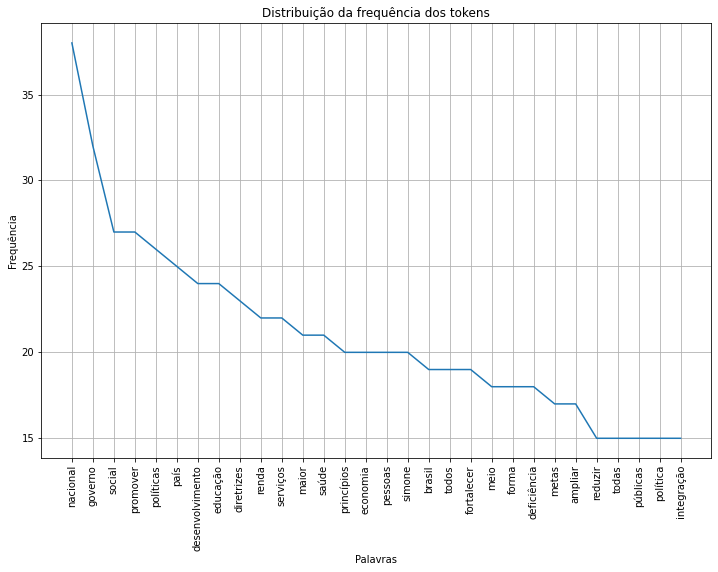

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df.Palavra, df.Frequencia)

ax.set(xlabel='Palavras', ylabel='Frequência', title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

### 2 - Nuvem de palavras <a id="72"></a>

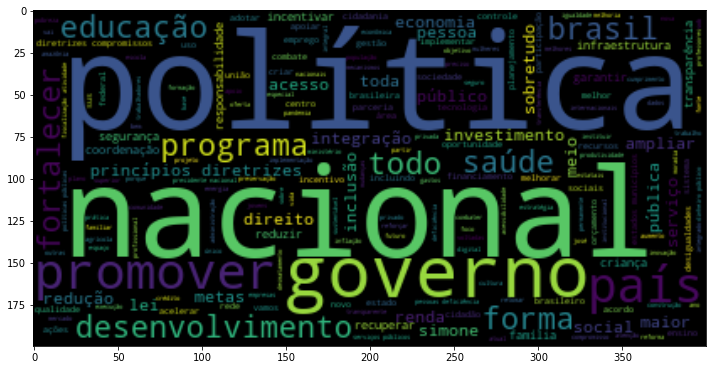

In [17]:
# concatenar os tokens limpos 
tokens_juntos = " ".join(s for s in conteudo_limpo)
wordcloud = WordCloud(background_color="black").generate(tokens_juntos)

# nuvem de palavras
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

Victor Resende™ <br>
Outubro, 2022